In [1]:
import networkx as nx
# import urllib -- Did not work on my linux machine - using requests instead
import re
import tqdm
import collections
import requests
#import community.community_louvain as cl
import json
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [2]:

# to create the network I will create a simple function that gets references from wiki article

def get_references(text):
    pattern = r'\[\[(.*?)\]\]'
    matches = re.findall(pattern, text)

    matches_more = []
    for match in matches:
        x = match.split('|')
        for m in x:
            matches_more.append(m)

    return matches_more

#The function above uses regex to gather everything inside double square brackets `[[]]`. We know that there might be more than one option there so after that we split everything on `|` mark.  



In [3]:

# Creating function to load up the rapper page

def get_wikipage(wiki_name):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = f"titles={wiki_name.replace(' ', '_')}" # replacing space with _
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json" # we want have it in json format


    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)


    wikitext = requests.get(query).content.decode('utf-8') # decoding to utf

    d = json.loads(wikitext)

    # now we want the actual latest article from wikipedia,
    # so we have to access this information within dictionaries
    page = d['query']['pages']
    page_id = list(page.keys())[0]
    page_title = page[page_id]['title']
    content = page[page_id]['revisions'][0]['*']

    return page_title, content

# better content
def get_wikipage_content(wiki_name):
    #wiki_name = wiki_name.decode('utf-8')
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    prop="extracts"
    exlimit='1'
    explaintext='1'
    title = f"titles={wiki_name.replace(' ', '_')}"
    content = "prop=extracts&rvprop=content"
    dataformat ="format=json"

    
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
    
    wikitext = requests.get(query).content.decode('utf-8')
    
    d = json.loads(wikitext)   

    page = d['query']['pages']
    page_id = list(page.keys())[0]
    page_title = page[page_id]['title']
    
    content = page[page_id]['extract']
    pattern = r'<[^>]*>'
    filtered_text = re.sub(pattern, '', content)

    return page_title, filtered_text

In [4]:
page_title, content = get_wikipage('List_of_music_genres_and_styles')

In [6]:
music_list = get_references(content)

In [7]:
better_music_list = copy.copy(music_list)

In [8]:
for x in better_music_list:
    if x + ' (music)' in better_music_list:
        better_music_list.remove(x)
    elif x + ' music' in better_music_list:
        better_music_list.remove(x)
    elif x + ' in music' in better_music_list:
        better_music_list.remove(x)
    elif x + ' (genre)' in better_music_list:
        better_music_list.remove(x)



In [9]:
with open ('music_genres_new.txt', 'w') as f:
    for x in better_music_list:
        f.writelines(x + '\n')

In [43]:
# I then manually go through music genres and manually remove some of the values

In [10]:
with open ('music_genres.txt', 'r') as f:
    genres = f.readlines()
    genres = [x.replace('\n', '') for x in genres]

In [11]:
genres[:5]

['Andalusian classical music',
 'Indian classical music',
 'Korean court music',
 'Persian classical music',
 'Western classical music']

In [12]:
page_title, content = get_wikipage_content('Korean court music')

In [13]:
Di = nx.DiGraph()
Di.add_nodes_from(genres)

In [14]:
for name in tqdm.tqdm(genres):

    try:
        # for each name get wikipage
        page_title, content = get_wikipage(name)
        _, clean_content = get_wikipage_content(name)
        Di.nodes[name]['content'] = clean_content
        # for each ref get wikipage
        
        for ref in get_references(content):
            
            # if it is add edge between those
            if ref in genres:
                if ref != name:
                    Di.add_edge(name, ref) 
    except:
        print(f'failed for: {page_title}')

  4%|███████                                                                                                                                                                                          | 51/1395 [00:29<10:16,  2.18it/s]

failed for: Classic female blues


  4%|████████▌                                                                                                                                                                                        | 62/1395 [00:34<09:42,  2.29it/s]

failed for: Jump blues


  6%|███████████▉                                                                                                                                                                                     | 86/1395 [00:49<11:20,  1.92it/s]

failed for: Bluegrass music


  7%|█████████████▊                                                                                                                                                                                  | 100/1395 [00:57<11:44,  1.84it/s]

failed for: Honky-tonk


  7%|██████████████                                                                                                                                                                                  | 102/1395 [00:59<13:16,  1.62it/s]

failed for: Country music


  8%|████████████████▏                                                                                                                                                                               | 118/1395 [01:08<10:01,  2.12it/s]

failed for: Western music (North America)


  9%|█████████████████▏                                                                                                                                                                            | 126/1395 [01:29<1:46:02,  5.01s/it]

failed for: Adult standards


 11%|████████████████████▏                                                                                                                                                                           | 147/1395 [01:40<09:32,  2.18it/s]

failed for: Andean new age music


 16%|██████████████████████████████▎                                                                                                                                                                 | 220/1395 [02:22<11:25,  1.71it/s]

failed for: Musique concrète


 17%|█████████████████████████████████                                                                                                                                                               | 240/1395 [02:33<10:16,  1.87it/s]

failed for: Neue Deutsche Welle


 26%|█████████████████████████████████████████████████▎                                                                                                                                              | 358/1395 [03:42<10:10,  1.70it/s]

failed for: Balearic beat


 30%|██████████████████████████████████████████████████████████                                                                                                                                      | 422/1395 [04:17<07:41,  2.11it/s]

failed for: Witch house (genre)


 34%|████████████████████████████████████████████████████████████████▉                                                                                                                               | 472/1395 [04:45<07:39,  2.01it/s]

failed for: Brostep


 44%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                                            | 608/1395 [06:05<06:29,  2.02it/s]

failed for: Jazz fusion


 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 739/1395 [07:21<04:56,  2.21it/s]

failed for: Yé-yé


 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                          | 741/1395 [07:22<04:29,  2.43it/s]

failed for: Classic soul


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 1139/1395 [11:38<02:25,  1.76it/s]

failed for: Pashto music


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 1140/1395 [11:39<01:58,  2.15it/s]

failed for: Pashto music


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 1141/1395 [11:39<01:55,  2.20it/s]

failed for: Pashto music


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 1142/1395 [11:39<01:37,  2.58it/s]

failed for: Pashto music


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 1143/1395 [11:40<01:45,  2.38it/s]

failed for: Pashto music


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 1145/1395 [11:41<01:56,  2.14it/s]

failed for: Mongolian folk music


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 1152/1395 [11:45<02:21,  1.72it/s]

failed for: Chinese hip hop


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 1209/1395 [12:22<01:25,  2.17it/s]

failed for: String (Thai pop)


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 1212/1395 [12:23<01:17,  2.38it/s]

failed for: Original Pilipino Music


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 1322/1395 [13:27<00:32,  2.25it/s]

failed for: Cumbia


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1395/1395 [14:14<00:00,  1.63it/s]


In [15]:
Di

In [16]:
pos = nx.kamada_kawai_layout(Di,scale=5)

In [20]:
G = Di.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G)) # sanity check

In [21]:
degrees = [G.degree[node] for node in G.nodes()]

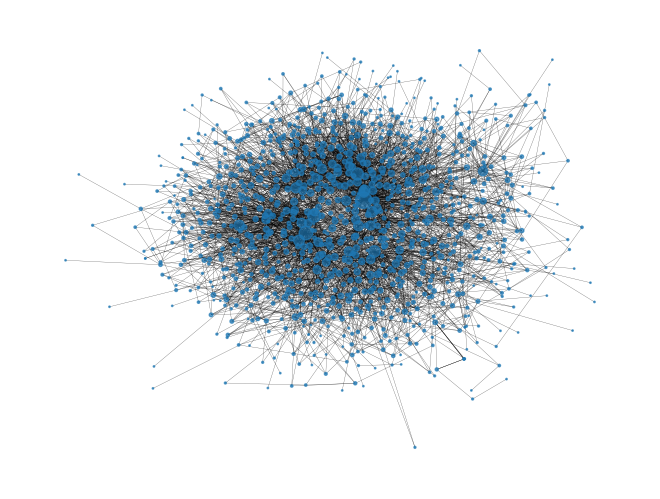

In [22]:
nx.draw(G, 
        pos,
       width = 0.2,
       with_labels=False,
       #node_color=color_map,
       node_size = degrees,
       #edge_color=edge_col,
       alpha=0.7, 
    )

In [28]:
nx.write_graphml(Di, 'directed.graphml')

In [29]:
nx.write_graphml(G, 'undirected.graphml')

# Further analysis 

In [2]:
D = nx.read_graphml('directed.graphml')

In [3]:
D.nodes['Techno']['content']

'\nTechno is a genre of electronic dance music (EDM) which is generally produced for use in a continuous DJ set, with tempo often varying between 120 and 150 (as per Marcello Perri) beats per minute (bpm). The central rhythm is typically in common time (4/4) and often characterized by a repetitive four on the floor beat. Artists may use electronic instruments such as drum machines, sequencers, and synthesizers, as well as digital audio workstations. Drum machines from the 1980s such as Roland\'s TR-808 and TR-909 are highly prized, and software emulations of such retro instruments are popular.\nMuch of the instrumentation in techno emphasizes the role of rhythm over other musical parameters. Techno tracks mainly progress over manipulation of timbral characteristics of synthesizer presets and, unlike forms of EDM that tend to be produced with synthesizer keyboards, techno does not always strictly adhere to the harmonic practice of Western music and such structures are often ignored in f

In [4]:
len(D.nodes)

1199

In [5]:
len(D.edges)

5141

In [10]:
print(D.nodes['Techno']['content'])


Techno is a genre of electronic dance music (EDM) which is generally produced for use in a continuous DJ set, with tempo often varying between 120 and 150 (as per Marcello Perri) beats per minute (bpm). The central rhythm is typically in common time (4/4) and often characterized by a repetitive four on the floor beat. Artists may use electronic instruments such as drum machines, sequencers, and synthesizers, as well as digital audio workstations. Drum machines from the 1980s such as Roland's TR-808 and TR-909 are highly prized, and software emulations of such retro instruments are popular.
Much of the instrumentation in techno emphasizes the role of rhythm over other musical parameters. Techno tracks mainly progress over manipulation of timbral characteristics of synthesizer presets and, unlike forms of EDM that tend to be produced with synthesizer keyboards, techno does not always strictly adhere to the harmonic practice of Western music and such structures are often ignored in favor